# Text Based Analyis on UN General Debates 

In [84]:
import pandas as pd

## Loading the Data 


In [85]:
# Reading CSV
file = "C:/Users/saimi/Downloads/un-general-debates-blueprint.csv"
df = pd.read_csv(file)

## Summary Of the Data 

In [86]:
# Displaying first 20 rows 
df.head(20)


,session,year,country,country_name,speaker,position,text
0,25,1970,ALB,Albania,Mr. NAS,NaN,33: May I first convey to our President the co...
1,25,1970,ARG,Argentina,Mr. DE PABLO PARDO,NaN,177.\t : It is a fortunate coincidence that pr...
2,25,1970,AUS,Australia,Mr. McMAHON,NaN,100.\t It is a pleasure for me to extend to y...
3,25,1970,AUT,Austria,Mr. KIRCHSCHLAEGER,NaN,155.\t May I begin by expressing to Ambassado...
4,25,1970,BEL,Belgium,Mr. HARMEL,NaN,"176. No doubt each of us, before coming up to ..."
5,25,1970,BLR,Belarus,Mr. GURINOVICH,NaN,\n71.\t. We are today mourning the untimely de...
6,25,1970,BOL,"Bolivia, Plurinational State of",Mr. CAMACHO OMISTE,NaN,135.\t I wish to congratulate the President o...
7,25,1970,BRA,Brazil,Mr. GIBSON BARBOZA,NaN,"1.\tMr. President, I should like, first of all..."
8,25,1970,CAN,Canada,Mr. SHARP,NaN,\nThe General Assembly is fortunate indeed to ...
9,25,1970,CMR,Cameroon,Mr. AHIDJO,President,: A year ago I came here as the Acting Preside...


In [87]:
# printing names of columns 

df.columns



Index(['session', 'year', 'country', 'country_name', 'speaker', 'position',
       'text'],
      dtype='object')

In [88]:
# Printing data types of columns
df.dtypes

session          int64
year             int64
country         object
country_name    object
speaker         object
position        object
text            object
dtype: object

In [89]:
# Info on columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7507 entries, 0 to 7506
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   session       7507 non-null   int64 
 1   year          7507 non-null   int64 
 2   country       7507 non-null   object
 3   country_name  7507 non-null   object
 4   speaker       7480 non-null   object
 5   position      4502 non-null   object
 6   text          7507 non-null   object
dtypes: int64(2), object(5)
memory usage: 410.7+ KB


In [90]:
# Describing the data 
df.describe()

,session,year
count,7507.000000,7507.000000
mean,49.610763,1994.610763
std,12.892155,12.892155
min,25.000000,1970.000000
25%,39.000000,1984.000000
50%,51.000000,1996.000000
75%,61.000000,2006.000000
max,70.000000,2015.000000


In [91]:
# Adding a Column Length
df['length'] = df ['text'].str.len()

In [92]:
# Describing after adding a new column
df.describe()

,session,year,length
count,7507.000000,7507.000000,7507.000000
mean,49.610763,1994.610763,17967.281604
std,12.892155,12.892155,7860.038463
min,25.000000,1970.000000,2362.000000
25%,39.000000,1984.000000,12077.000000
50%,51.000000,1996.000000,16424.000000
75%,61.000000,2006.000000,22479.500000
max,70.000000,2015.000000,72041.000000


In [93]:
# Describing the Objects in data
df.describe(include='O')

,country,country_name,speaker,position,text
count,7507,7507,7480,4502,7507
unique,199,199,5428,113,7507
top,ALB,Albania,Seyoum Mesfin,Minister for Foreign Affairs,33: May I first convey to our President the co...
freq,46,46,12,1813,1


## Pre-Processing Data

In [94]:
# Printing NA values in the data 
df.isna().sum()

session            0
year               0
country            0
country_name       0
speaker           27
position        3005
text               0
length             0
dtype: int64

In [95]:
# Filling NA values in Speaker column
df['speaker'].fillna('unknown',inplace = True)

C:\Users\saimi\AppData\Local\Temp\ipykernel_23556\504508903.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['speaker'].fillna('unknown',inplace = True)


In [96]:
# Filling NA values in Position Column
df['position'].fillna('unknown',inplace = True)

C:\Users\saimi\AppData\Local\Temp\ipykernel_23556\3770456084.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['position'].fillna('unknown',inplace = True)


In [97]:
df.isna().sum()

session         0
year            0
country         0
country_name    0
speaker         0
position        0
text            0
length          0
dtype: int64

In [98]:
# Converting All text in to Upper Case 
df['speaker'] = df['speaker'].str.upper()
df['position'] = df['position'].str.upper()
df['text']= df['text'].str.upper()


## Visualizations

In [99]:
import matplotlib.pyplot as plt

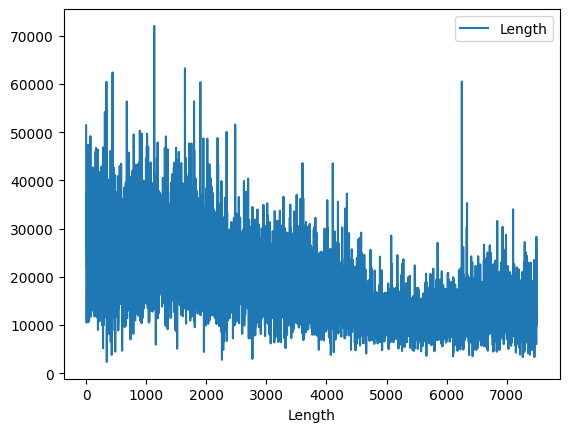

In [100]:
# Plot on Matplotplib
plt.plot(df['length'])
plt.xlabel('Length')
plt.legend(['Length'])
plt.show()

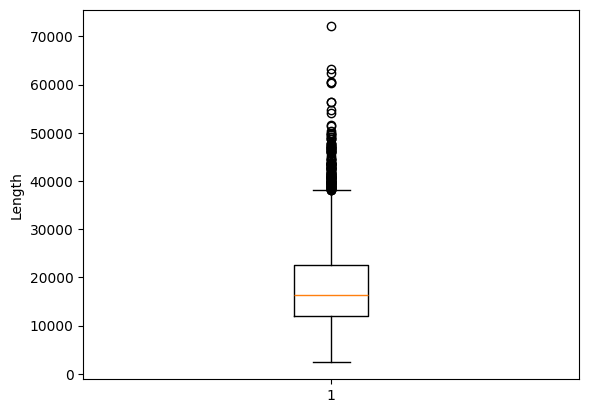

In [101]:
# Box plot on Length
plt.boxplot(df['length'])
plt.ylabel('Length')
plt.show()


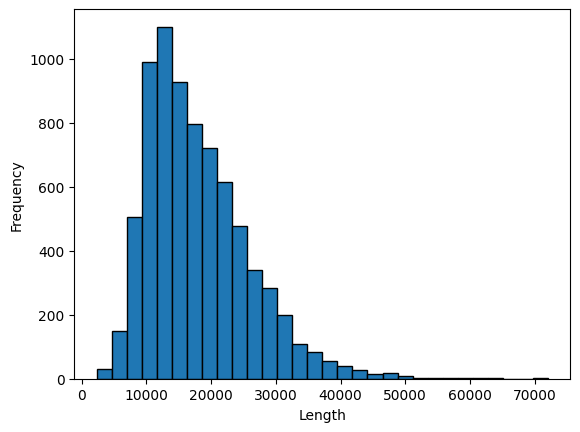

In [102]:
# Histogram on Length 
plt.hist(df['length'], bins=30, edgecolor= 'black')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

In [103]:
import seaborn as sns


C:\Users\saimi\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


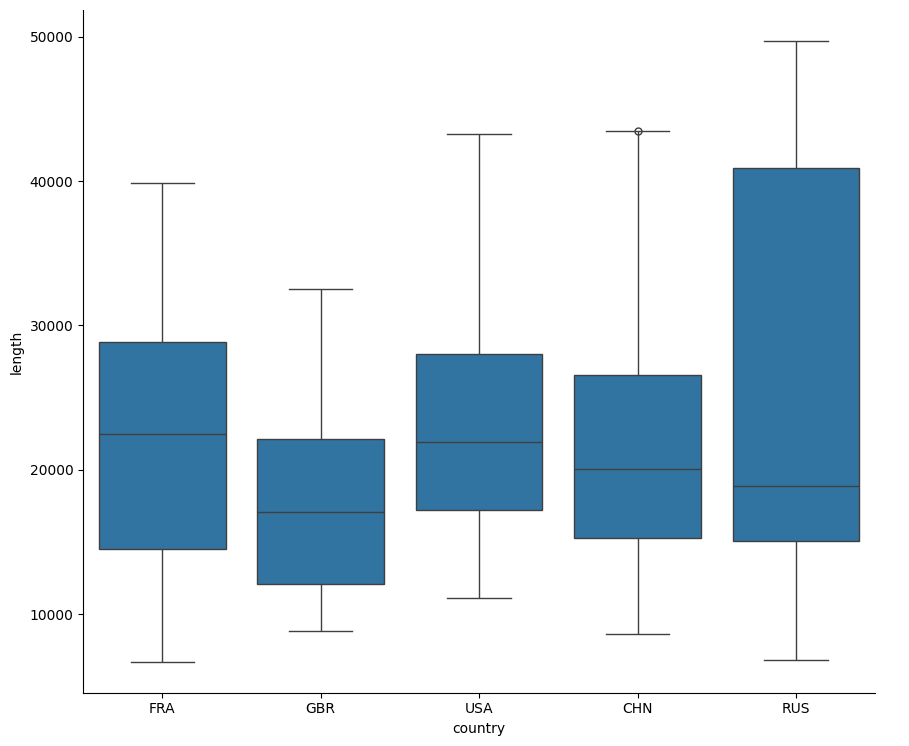

In [104]:
# Box Plot on Country vs Length 
where = df['country'].isin(['USA', 'FRA', 'GBR', 'CHN', 'RUS'])
g = sns.catplot(data=df[where], x="country", y="length", kind='box')
g.fig.set_size_inches(10, 8)

## Manipulating Text using Regex


In [105]:
import regex as re 

In [106]:
#Defining a Function of the regex 
def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)

In [107]:
testtext = "Let's defeat SARS-CoV-2 together in 2020! www.cdc.gov"
testtokens = tokenize(testtext)
print(testtokens)

['Let', 's', 'defeat', 'SARS-CoV-2', 'together', 'in', 'www', 'cdc', 'gov']


In [108]:
# Importing all the stop words
import nltk
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)

{'now', 'during', 'doing', 'himself', 'nor', 'for', 'hers', 'down', "aren't", 'each', 'more', 'yourselves', 'over', 'haven', 'then', 'will', 'those', 'all', 'these', 'isn', 'than', 'does', 'i', 'she', 'couldn', 'should', 'aren', 'who', 'yourself', "couldn't", 'ma', 'here', 've', 'some', 'such', 'below', 'to', 'm', "isn't", "wasn't", 'after', "shouldn't", 'between', 'their', 'had', 'he', 'herself', 'what', 'and', 'hadn', 'me', "mustn't", "that'll", 'not', 'if', 'were', 'wasn', 'myself', 'that', 'did', 'but', 'them', "should've", 'y', 'shan', 'off', 'his', 'won', 'are', 'with', 'am', 'her', 'didn', 'most', 'was', 'itself', "weren't", "she's", 'why', 'mustn', 'your', 'before', 'ain', 'yours', 'under', 'again', 'where', 'so', "wouldn't", 'll', "haven't", "shan't", 'at', "won't", 'him', 'about', 'both', 'into', 'in', 'against', 'wouldn', 'as', 'how', 'few', 'once', "you'd", 'own', 'o', 'whom', 'mightn', 'be', "you're", 'when', 't', 'do', 'themselves', 'of', 'no', 'through', 'don', 'out', 'a

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saimi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [109]:
# Defining a function to remove stop words
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]

In [110]:
# Tokens after removing stop words
cleantokens= remove_stop(testtokens)
print(cleantokens)

['Let', 'defeat', 'SARS-CoV-2', 'together', 'www', 'cdc', 'gov']


## Creating a Pipeline for removing StopWords

In [111]:
#  Creating a pipeline
pipeline = [str.lower, tokenize, remove_stop]

In [112]:
# Defining a function to run the pipeline 
def prepare(text, pipeline):
    tokens = text
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens

In [113]:
# Applying he function to text 
df['tokens'] = df['text'].apply(prepare, pipeline = pipeline)

In [114]:
 # Creating a new column for the number of tokens
df['num_tokens'] = df['tokens'].map(len)
df.tail()

,session,year,country,country_name,speaker,position,text,length,tokens,num_tokens
7502,70,2015,YEM,Yemen,MR. ABDRABUH MANSOUR HADI MANSOUR,PRESIDENT,ON BEHALF OF THE PEOPLE AND THE GOVERNMENT OF ...,10568,"[behalf, people, government, yemen, would, lik...",894
7503,70,2015,YUG,Yugoslavia,MR. TOMISLAV NIKOLIĆ,PRESIDENT,\nSEVENTY YEARS HAVE PASSED SINCE THE ESTABLIS...,25430,"[seventy, years, passed, since, establishment,...",2118
7504,70,2015,ZAF,South Africa,JACOB ZUMA,PRESIDENT,I SHOULD LIKE TO CONGRATULATE THE PRESIDENT AN...,13662,"[like, congratulate, president, country, denma...",1160
7505,70,2015,ZMB,Zambia,MR. EDGAR CHAGWA LUNGU,PRESIDENT,I WOULD LIKE TO BEGIN BY THANKING THE SECRETAR...,14247,"[would, like, begin, thanking, secretary-gener...",1197
7506,70,2015,ZWE,Zimbabwe,ROBERT MUGABE,PRESIDENT,ALLOW ME AT THE OUTSET TO EXTEND TO MR. MOGENS...,11013,"[allow, outset, extend, mr, mogens, lykketoft,...",903


## Finding the frequency of words in tokens

In [115]:
#Importing a function Counter
from collections import Counter
tokens = tokenize("She likes my cats and my cats like my sofa.")
testcount= Counter(tokens)
print(testcount)


Counter({'my': 3, 'cats': 2, 'She': 1, 'likes': 1, 'and': 1, 'like': 1, 'sofa': 1})


In [116]:
more_tokens = tokenize("She likes dogs and cats.")
testcount.update(more_tokens)
print(testcount)

Counter({'my': 3, 'cats': 3, 'She': 2, 'likes': 2, 'and': 2, 'like': 1, 'sofa': 1, 'dogs': 1})


In [117]:
# Printing the 5 most occurred tokens
counter = Counter()
df['tokens'].map(counter.update)
print(counter.most_common(5))

[('nations', 124508), ('united', 120763), ('international', 117223), ('world', 89421), ('countries', 85734)]


In [118]:
# Creating a new data frame for frequency 
freq_df = pd.DataFrame.from_dict(counter,orient='index', columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = 'token'

In [119]:
# Sorting the freq_df
freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(10)

,freq
token,
nations,124508
united,120763
international,117223
world,89421
countries,85734
peace,72625
development,62632
states,59713
people,59338


In [120]:
freq_df.describe()

,freq
count,68302.000000
mean,162.686276
std,1544.080072
min,1.000000
25%,1.000000
50%,2.000000
75%,15.000000
max,124508.000000


## Frequency Maps

[Text(0.5, 0, 'Frequency'), Text(0, 0.5, 'Token'), Text(0.5, 1.0, 'Top Words')]

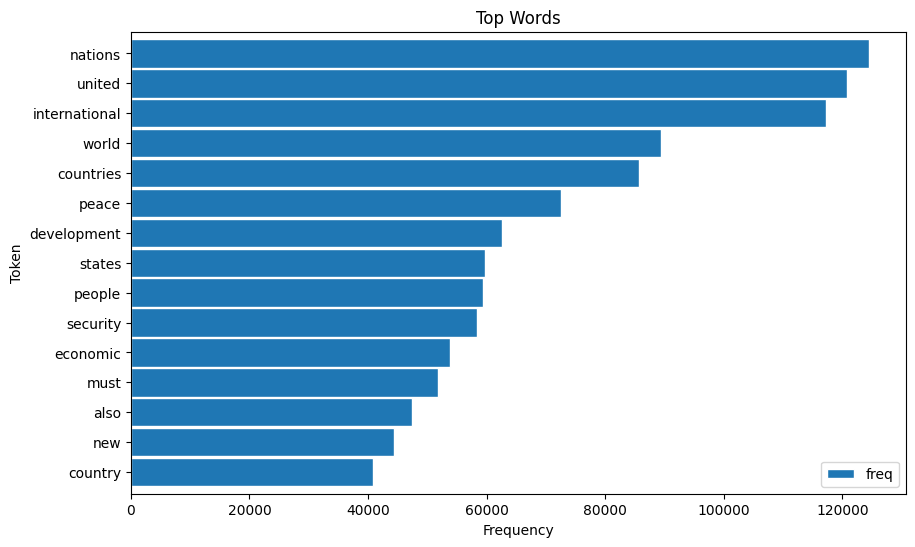

In [121]:
# Plotting a inverted bar graph for most frequent words 
ax = freq_df.head(15).plot(kind='barh', width=0.95, figsize=(10,6),edgecolor ='white')
ax.invert_yaxis()
ax.set(xlabel='Frequency', ylabel='Token', title='Top Words')

(-0.5, 599.5, 299.5, -0.5)

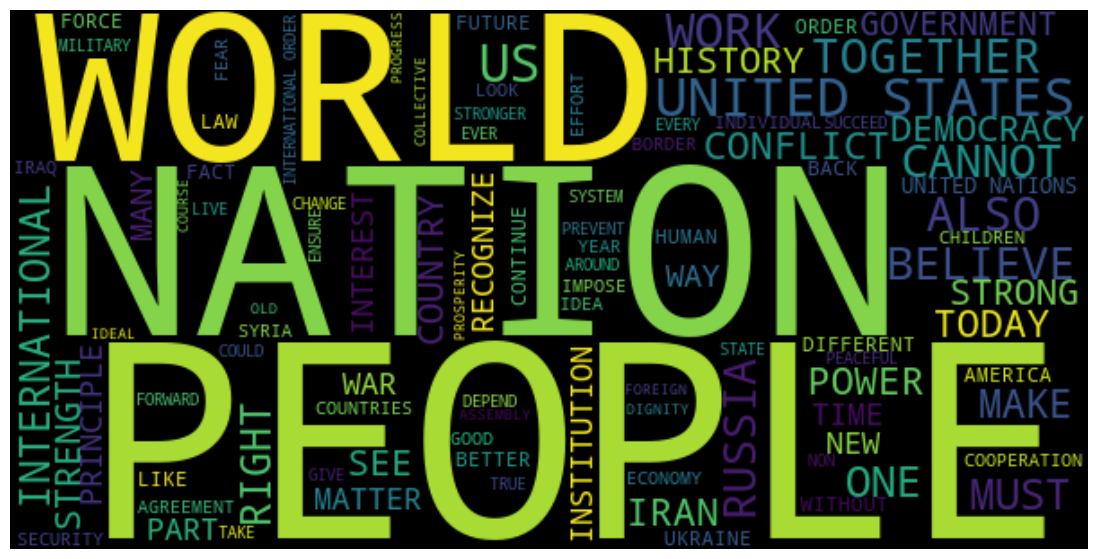

In [122]:
# Importing Worldcloud
from wordcloud import WordCloud
from matplotlib import pyplot as plt
text = df.query("year==2015 and country=='USA'")['text'].values[0]
plt.figure(figsize=(14, 7))
wc = WordCloud( width = 600, height=300,max_words=100, stopwords=stopwords)
wc.generate(text)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

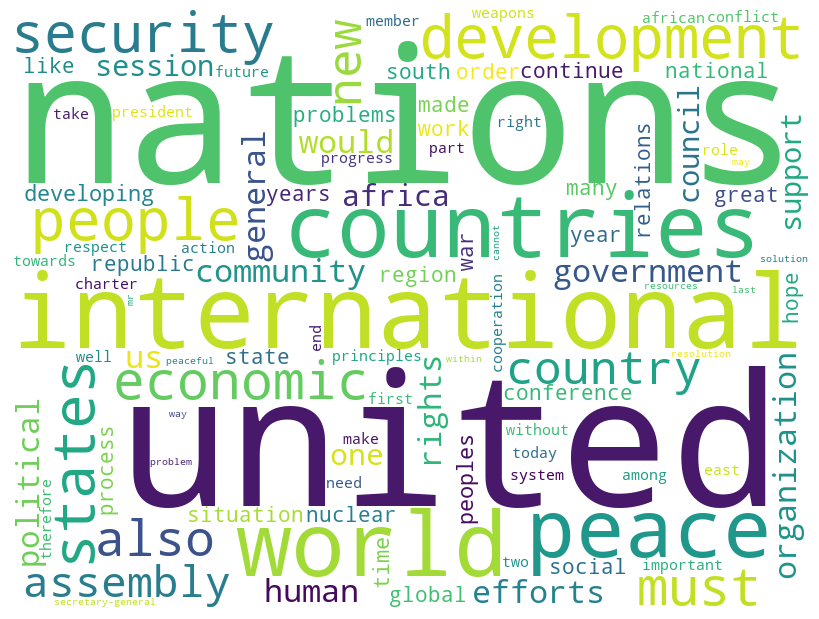

In [123]:
# World cloud on Frequency 
wc = WordCloud(background_color='white', width = 800, height=600,max_words=100, margin=2)
wc.fit_words(freq_df['freq'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()